<a href="https://colab.research.google.com/github/Asaikumarnayak/python/blob/main/datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
default=pd.read_csv("/content/Default.csv")

In [ ]:
default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [ ]:
default.shape

(10000, 4)

In [ ]:
default.describe

<bound method NDFrame.describe of      default student  balance    income
0         No      No   729.53  44361.63
1         No     Yes   817.18  12106.13
2         No      No  1073.55  31767.14
3         No      No   529.25  35704.49
4         No      No   785.66  38463.50
...      ...     ...      ...       ...
9995      No      No   711.56  52992.38
9996      No      No   757.96  19660.72
9997      No      No   845.41  58636.16
9998      No      No  1569.01  36669.11
9999      No     Yes   200.92  16862.95

[10000 rows x 4 columns]>

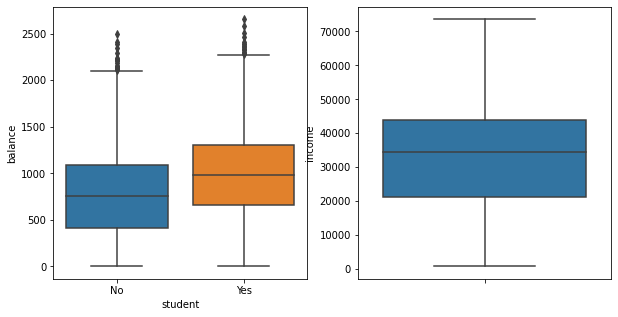

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=default["student"],y=default["balance"])
plt.subplot(1,2,2)
sns.boxplot(y=default["income"])
plt.show()
#in box plot we use x and y while assigining we assign categorical column on x and numerical column on y

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


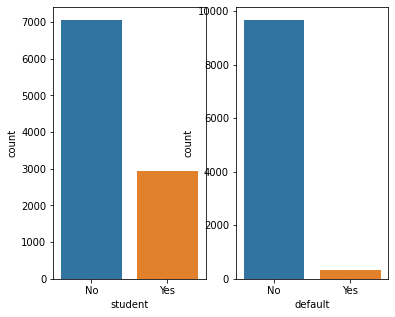

In [ ]:
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
sns.countplot(default["student"])
plt.subplot(1,2,2)
sns.countplot(default["default"])
plt.show()

In [ ]:
default["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
default["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
default["student"].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


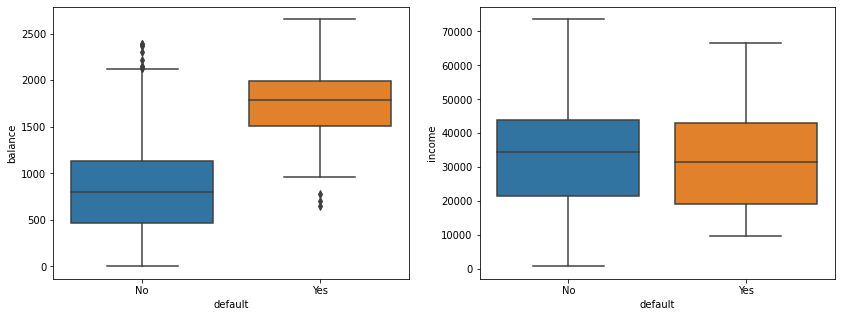

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(default["default"],default["balance"])
plt.subplot(1,2,2)
sns.boxplot(default["default"],default["income"])
plt.show()

In [ ]:
pd.crosstab(default["student"],default["default"],normalize="index")

default,No,Yes
student,,
No,0.970805,0.029195
Yes,0.956861,0.043139


In [ ]:
pd.crosstab(default["student"],default["default"],normalize="index").round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


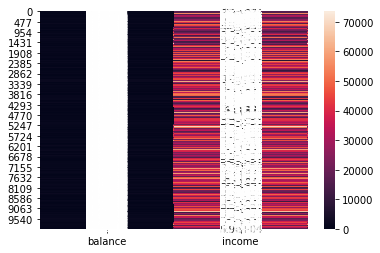

In [ ]:
sns.heatmap(default[["balance","income"]],annot=True)
plt.show()

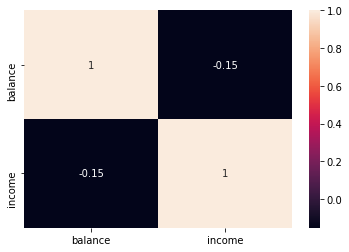

In [ ]:
#to know the relation between numerical column we use corr()
sns.heatmap(default[["balance","income"]].corr(),annot=True)
plt.show()
#as you can seee if the value of the balance is increase the income will decrease by o.15 times

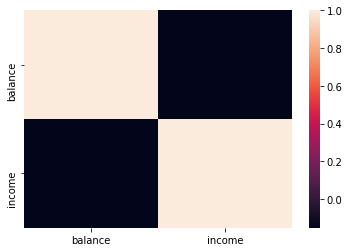

In [ ]:
sns.heatmap(default[["balance","income"]].corr())
plt.show()

In [ ]:
default.isnull()

,default,student,balance,income
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
9995,False,False,False,False
9996,False,False,False,False
9997,False,False,False,False
9998,False,False,False,False


In [ ]:
default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [ ]:
default.isnull().count

<bound method DataFrame.count of       default  student  balance  income
0       False    False    False   False
1       False    False    False   False
2       False    False    False   False
3       False    False    False   False
4       False    False    False   False
...       ...      ...      ...     ...
9995    False    False    False   False
9996    False    False    False   False
9997    False    False    False   False
9998    False    False    False   False
9999    False    False    False   False

[10000 rows x 4 columns]>

In [ ]:
q1,q3=default["balance"].quantile([.25,.75])

In [ ]:
q1
q3

1166.305

In [ ]:
iqr=q3-q1
ll=q1-1.5*(iqr)
ul=q3+1.5*(iqr)

In [ ]:
ll

-545.1262500000001

In [ ]:
ul

2193.16375

In [ ]:
df=default[default["balance"]>ul]

In [ ]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [ ]:
#to know the no.of outliers present in the df we choose a categorical column and we use sum()
df["student"].count()

31

In [ ]:
#we cannot go and remove the 31 records in the df so  we are bringing the outliers to the ul

In [ ]:
df["default"].value_counts(normalize=True)


Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [ ]:
df["default"].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [ ]:
default["balance"]=np.where(default["balance"]>ul,ul,default["balance"])
#bringing the outliers to the upper limitby assigining the outliers values to ul 

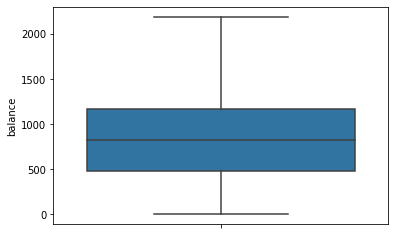

In [ ]:
sns.boxplot(y=default["balance"])
plt.show()

In [ ]:
default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')